Text(0.5, 1.0, 'cannabis licenses by %')

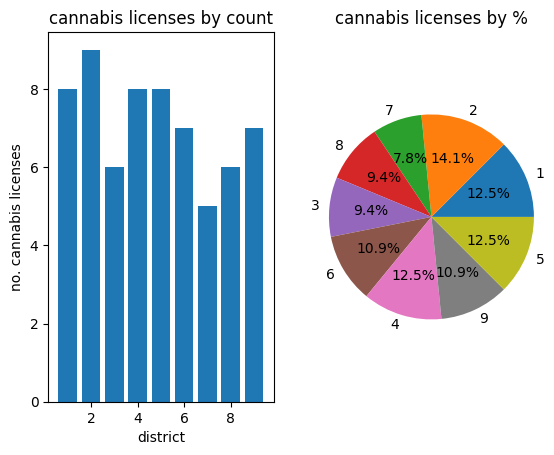

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geojson
from shapely.geometry import shape, Point

license_data = pd.read_csv("Cannabis_Registry.csv")
with open("City_Council_Districts_View.geojson") as f:
    gj = geojson.load(f)

district_names = []
total_num_licenses = []
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    num_licenses = len(license_data[license_data.apply(lambda x: Point(x.x,x.y).within(boundaries), axis=1)])
    total_num_licenses.append(num_licenses)
# print(total_num_licenses)
# print(district_names)

ax1 = plt.subplot(1,2,1)
ax1.bar(x=district_names,height=total_num_licenses) 
ax1.set_xlabel("district")
ax1.set_ylabel("no. cannabis licenses")
ax1.set_title("cannabis licenses by count")
ax2 = plt.subplot(1,2,2)
ax2.pie(total_num_licenses,labels=district_names,autopct='%1.1f%%',) 
ax2.axis("equal")
ax2.set_title("cannabis licenses by %")